# LangChain: 通过组合模块和能力抽象来扩展 LLM 的助手

LangChain并不提供自己的LLMs，而是为与许多不同的LLMs（OpenAI、Cohere、Hugging Face等）进行交互提供了一个标准接口。支持的有语言模型（llms）和聊天模型（chat models）

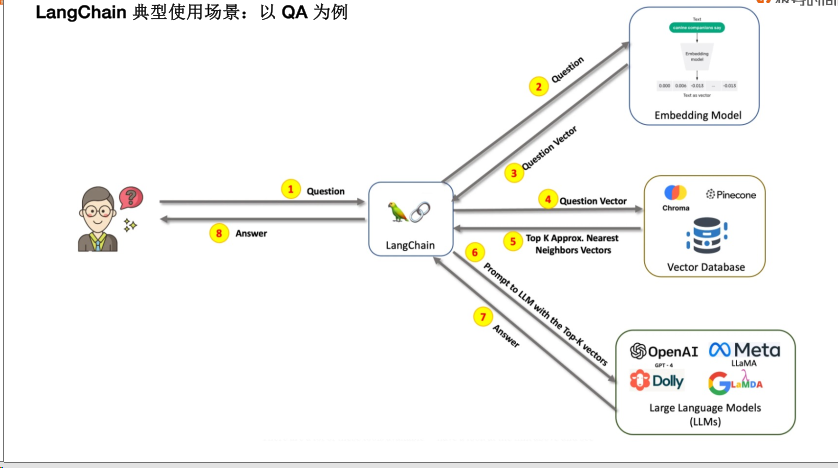

In [1]:
!pip install -U langchain

  Using cached langchain-0.1.14-py3-none-any.whl.metadata (13 kB)
  Using cached aiohttp-3.9.3-cp311-cp311-win_amd64.whl.metadata (7.6 kB)
  Using cached jsonpatch-1.33-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached langchain_text_splitters-0.0.1-py3-none-any.whl.metadata (2.0 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached frozenlist-1.4.1-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached multidict-6.0.5-cp311-cp311-win_amd64.whl.metadata (4.3 kB)
  Using cached yarl-1.9.4-cp311-cp311-win_amd64.whl.metadata (32 kB)
  Using cached jsonpointer-2.4-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached greenlet-3.0.3-cp311-cp311-win_amd64.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/812.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/812.8 kB ? eta -:--:--
    --------------------------------------- 10.2/812.8 kB ? eta -:--:--
    --------------------------------------- 10.2/812.8 kB ? eta -:--

##  1.Models：以通用接口调用语言模型

In [1]:
import os
import socket
import socks

socks.set_default_proxy(socks.SOCKS5, "127.0.0.1", 10808)
socket.socket = socks.socksocket

In [2]:

from langchain.llms import OpenAI

llm = OpenAI()

print(llm("给我讲一个关于人工智能的故事"))

d:\sdk\Anaconda3\envs\bigmodel\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.openai.OpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(
d:\sdk\Anaconda3\envs\bigmodel\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




在未来的某一天，人类发明了一种名为“AI”的人工智能系统，它拥有超乎人类想象的智能和能力。人们开始把它应用到各个领域，希望它能帮助解决人类面临的各种问题。

其中一个应用是在医疗领域，AI被用来辅助医生诊断疾病。它可以通过分析海量的医学数据和病人的病历，快速诊断出疾病的类型和严重程度，甚至能提供治疗方案和建议。这让医生们的工作效率大大提高，也让病人能够更快地得到治疗。

一天，一位名叫艾米的女孩来到医院，她


In [3]:
from langchain.chat_models import ChatOpenAI

chat_model = ChatOpenAI(model_name="gpt-3.5-turbo")

from langchain.schema import (
    AIMessage,
    HumanMessage,
    SystemMessage
)

messages = [SystemMessage(content="You are a helpful assistant."),
HumanMessage(content="Who won the world series in 2020?"),
AIMessage(content="The Los Angeles Dodgers won the World Series in 2020."), 
HumanMessage(content="Where was it played?")]

print(messages)
chat_model(messages)


d:\sdk\Anaconda3\envs\bigmodel\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


[SystemMessage(content='You are a helpful assistant.'), HumanMessage(content='Who won the world series in 2020?'), AIMessage(content='The Los Angeles Dodgers won the World Series in 2020.'), HumanMessage(content='Where was it played?')]


d:\sdk\Anaconda3\envs\bigmodel\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


AIMessage(content='The World Series in 2020 was played at Globe Life Field in Arlington, Texas.', response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 53, 'total_tokens': 71}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': 'fp_b28b39ffa8', 'finish_reason': 'stop', 'logprobs': None}, id='run-0d1800d9-6110-46b6-9aa9-ba79d10f7b20-0')

## 2.Prompts：模板化、动态选择和管理模型输入

### 使用 from_template 方法实例化 PromptTemplate

通常，PromptTemplate 类的实例，使用Python的str.format语法生成模板化提示。

使用 from_template 方法实例化 PromptTemplate

In [4]:

from langchain import PromptTemplate

prompt_template = PromptTemplate.from_template(
    "Tell me a {adjective} joke about {content}."
)

# 使用 format 生成提示
prompt = prompt_template.format(adjective="funny", content="chickens")
print(prompt)

Tell me a funny joke about chickens.


### 使用构造函数（Initializer）实例化 

使用构造函数实例化 prompt_template 时必须传入参数：input_variables 和 template。

在生成提示过程中，会检查输入变量与模板字符串中的变量是否匹配，如果不匹配，则会引发异常；


In [5]:
valid_prompt = PromptTemplate(
    input_variables=["adjective", "content"],
    template="Tell me a {adjective} joke about {content}."
)


from langchain.llms import OpenAI

prompt = valid_prompt.format(adjective="funny", content="chickens")
print(f"prompt: {prompt}")


llm = OpenAI(max_tokens=1000)

print(llm(prompt))

prompt: Tell me a funny joke about chickens.


Why did the chicken cross the playground?

To get to the other slide!


## 3.Output Parser：从模型输出中提取信息，并规范化内容

语言模型的输出是文本。

但很多时候，您可能希望获得比纯文本更结构化的信息。这就是输出解析器的价值所在。

输出解析器是帮助结构化语言模型响应的类。

列表解析 List Parser

In [6]:

from langchain.output_parsers import CommaSeparatedListOutputParser
from langchain.prompts import PromptTemplate, ChatPromptTemplate, HumanMessagePromptTemplate
from langchain.llms import OpenAI

# 创建一个输出解析器，用于处理带逗号分隔的列表输出
output_parser = CommaSeparatedListOutputParser()

# 获取格式化指令，该指令告诉模型如何格式化其输出
format_instructions = output_parser.get_format_instructions()

# 创建一个提示模板，它会基于给定的模板和变量来生成提示
prompt = PromptTemplate(
    template="List five {subject}.\n{format_instructions}",  # 模板内容
    input_variables=["subject"],  # 输入变量
    partial_variables={"format_instructions": format_instructions}  # 预定义的变量，这里我们传入格式化指令
)

In [7]:
_input_prompt = prompt.format(subject="ice cream flavors")
print(_input_prompt)


List five ice cream flavors.
Your response should be a list of comma separated values, eg: `foo, bar, baz`


In [8]:
chat_model = ChatOpenAI(model_name="gpt-3.5-turbo")

from langchain.schema import (
    AIMessage,
    HumanMessage,
    SystemMessage
)

messages = [SystemMessage(content="You are a helpful assistant."),
HumanMessage(content=_input_prompt)]

print(messages)
output = chat_model(messages)
print(output)

[SystemMessage(content='You are a helpful assistant.'), HumanMessage(content='List five ice cream flavors.\nYour response should be a list of comma separated values, eg: `foo, bar, baz`')]
content='Vanilla, Chocolate, Strawberry, Mint Chocolate Chip, Cookie Dough' response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 43, 'total_tokens': 56}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': 'fp_b28b39ffa8', 'finish_reason': 'stop', 'logprobs': None} id='run-76e4325f-c6b6-4687-8b55-f8599052301b-0'


In [9]:
clear_output = output_parser.parse(output.content)

In [10]:
print(clear_output,type(clear_output))

['Vanilla', 'Chocolate', 'Strawberry', 'Mint Chocolate Chip', 'Cookie Dough'] <class 'list'>


日期解析 Datatime Parser

In [11]:
from langchain.output_parsers import DatetimeOutputParser
from langchain.chains import LLMChain

output_parser = DatetimeOutputParser()
template = """Answer the users question:

{question}

{format_instructions}"""

prompt = PromptTemplate.from_template(
    template,
    partial_variables={"format_instructions": output_parser.get_format_instructions()},
)

In [12]:
_input_prompt = prompt.format(question="around when was bitcoin founded?")
print(_input_prompt)

Answer the users question:

around when was bitcoin founded?

Write a datetime string that matches the following pattern: '%Y-%m-%dT%H:%M:%S.%fZ'.

Examples: 0928-09-07T20:08:45.439835Z, 0709-12-25T22:12:42.177441Z, 0705-03-06T17:19:33.427292Z

Return ONLY this string, no other words!


In [13]:
messages = [SystemMessage(content="You are a helpful assistant."),
HumanMessage(content=_input_prompt)]

print(messages)
output = chat_model(messages)
print(output)

[SystemMessage(content='You are a helpful assistant.'), HumanMessage(content="Answer the users question:\n\naround when was bitcoin founded?\n\nWrite a datetime string that matches the following pattern: '%Y-%m-%dT%H:%M:%S.%fZ'.\n\nExamples: 0928-09-07T20:08:45.439835Z, 0709-12-25T22:12:42.177441Z, 0705-03-06T17:19:33.427292Z\n\nReturn ONLY this string, no other words!")]


content='2009-01-03T18:15:05.000000Z' response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 118, 'total_tokens': 134}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': 'fp_b28b39ffa8', 'finish_reason': 'stop', 'logprobs': None} id='run-8aa0d4e6-e6c0-4dab-914d-906c110cae5a-0'


In [14]:
clear_output = output_parser.parse(output.content)
print(clear_output,type(clear_output))

2009-01-03 18:15:05 <class 'datetime.datetime'>
